<a href="https://colab.research.google.com/github/SharavanMudaliar/Colab/blob/main/CustomerVoiceAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("=" * 80)
print("CustomerVoiceAI: Installation Starting...")
print("=" * 80)

CustomerVoiceAI: Installation Starting...


In [ ]:
!pip install -q transformers pandas scikit-learn matplotlib seaborn wordcloud textblob plotly nltk
!pip install -q spacy
!python -m spacy download en_core_web_sm
print("✅ All packages installed successfully!\n")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ All packages installed successfully!



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
from textblob import TextBlob
from transformers import pipeline
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

# Machine Learning Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# Visualization
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Load spaCy
nlp = spacy.load('en_core_web_sm')

print("=" * 80)
print("✅ All libraries imported successfully!")
print("=" * 80)


✅ All libraries imported successfully!


In [ ]:
print("\n📊 Creating Sample Customer Feedback Dataset...\n")

# Comprehensive sample dataset
sample_feedback = [
    "The product quality is excellent and delivery was very fast",
    "Very disappointed with customer service, slow response time",
    "Great value for money, highly recommend to everyone",
    "Product arrived damaged, packaging was extremely poor",
    "Amazing experience, will definitely buy again soon",
    "The website is confusing and hard to navigate",
    "Best purchase I have made this year, love it",
    "Product does not match description, very upset and angry",
    "Quick delivery and excellent quality as expected",
    "Customer support was very helpful and responsive",
    "Overpriced for what you get, not worth it",
    "Love the product design and functionality, perfect",
    "Shipping took too long, not happy at all",
    "Exceptional quality and great customer service experience",
    "Product broke after one week of use, terrible",
    "Easy to use and works perfectly as described",
    "Not worth the price, poor quality materials used",
    "Fast shipping and product exactly as described",
    "Very satisfied with my purchase, exceeded expectations",
    "Terrible experience, would not recommend to anyone",
    "The product exceeded all my expectations",
    "Poor packaging, product arrived completely broken",
    "Great product but a bit expensive for budget",
    "Customer service needs significant improvement",
    "Best quality product in this price range available",
    "The interface is user-friendly and intuitive to use",
    "Received wrong item, return process was difficult",
    "Outstanding product features and amazing performance",
    "Website crashed during checkout, very frustrating experience",
    "Product images were misleading, disappointed with actual item",
    "Excellent communication from the support team throughout",
    "Delivery was delayed by two weeks without notification",
    "High quality materials and excellent craftsmanship evident",
    "Refund process took too long, poor customer service",
    "Product works great but instructions were unclear and confusing",
    "Amazing discount offer, got great value for money",
    "The app keeps crashing, needs technical improvement urgently",
    "Product is durable and long-lasting, very satisfied",
    "Payment gateway issues, could not complete purchase easily",
    "Best customer service experience I have ever had",
    "Product quality declined compared to previous version sadly",
    "Fast and reliable shipping service, impressed overall",
    "Too many advertisements on the website, very annoying",
    "Product arrived early, packaging was excellent and secure",
    "Subscription cancellation was difficult and time-consuming process",
    "Innovative features that stand out from competitors greatly",
    "Poor quality control, received defective item initially",
    "Loyalty program benefits are excellent and rewarding",
    "Website navigation needs improvement for better user experience",
    "Product exceeded quality expectations, highly recommend purchasing"
]

# Create DataFrame
data = pd.DataFrame({
    'feedback_id': range(1, len(sample_feedback) + 1),
    'feedback': sample_feedback,
    'timestamp': pd.date_range(start='2024-01-01', periods=len(sample_feedback), freq='D')
})

# OR Load your own CSV:
# data = pd.read_csv('your_feedback_data.csv')

print(f"✅ Dataset loaded: {len(data)} feedback entries")
print(f"Columns: {list(data.columns)}")
print("\nFirst 5 entries:")
print(data.head())


📊 Creating Sample Customer Feedback Dataset...

✅ Dataset loaded: 50 feedback entries
Columns: ['feedback_id', 'feedback', 'timestamp']

First 5 entries:
   feedback_id                                           feedback  timestamp
0            1  The product quality is excellent and delivery ... 2024-01-01
1            2  Very disappointed with customer service, slow ... 2024-01-02
2            3  Great value for money, highly recommend to eve... 2024-01-03
3            4  Product arrived damaged, packaging was extreme... 2024-01-04
4            5  Amazing experience, will definitely buy again ... 2024-01-05


In [ ]:
print("\n" + "=" * 80)
print("🔧 DATA PREPROCESSING")
print("=" * 80)

def preprocess_text(text):
    """Advanced text preprocessing"""
    if pd.isna(text) or text == '':
        return ""

    # Convert to lowercase
    text = str(text).lower()

    # Process with spaCy
    doc = nlp(text)

    # Lemmatization, remove stopwords, punctuation, keep only alphabetic
    tokens = [token.lemma_ for token in doc
              if not token.is_stop
              and not token.is_punct
              and token.is_alpha
              and len(token.text) > 2]

    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing text data...")
data['cleaned'] = data['feedback'].apply(preprocess_text)

# Calculate text statistics
data['word_count'] = data['feedback'].str.split().str.len()
data['char_count'] = data['feedback'].str.len()

print("✅ Preprocessing complete!")
print("\nText Statistics:")
print(f"Average word count: {data['word_count'].mean():.2f}")
print(f"Average character count: {data['char_count'].mean():.2f}")

print("\nSample Preprocessing Results:")
print(data[['feedback', 'cleaned']].head(3))


🔧 DATA PREPROCESSING
Preprocessing text data...
✅ Preprocessing complete!

Text Statistics:
Average word count: 7.54
Average character count: 52.42

Sample Preprocessing Results:
                                            feedback  \
0  The product quality is excellent and delivery ...   
1  Very disappointed with customer service, slow ...   
2  Great value for money, highly recommend to eve...   

                                            cleaned  
0           product quality excellent delivery fast  
1  disappointed customer service slow response time  
2                great value money highly recommend  


In [ ]:
print("\n" + "=" * 80)
print("😊 SENTIMENT ANALYSIS")
print("=" * 80)

# Method 1: TextBlob
print("\n1️⃣ TextBlob Sentiment Analysis...")
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return 'POSITIVE', polarity
    elif polarity < -0.1:
        return 'NEGATIVE', polarity
    else:
        return 'NEUTRAL', polarity

textblob_results = data['feedback'].apply(get_textblob_sentiment)
data['sentiment_textblob'] = textblob_results.apply(lambda x: x[0])
data['polarity_textblob'] = textblob_results.apply(lambda x: x[1])

# Method 2: VADER
print("2️⃣ VADER Sentiment Analysis...")
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']

    if compound >= 0.05:
        return 'POSITIVE', compound
    elif compound <= -0.05:
        return 'NEGATIVE', compound
    else:
        return 'NEUTRAL', compound

vader_results = data['feedback'].apply(get_vader_sentiment)
data['sentiment_vader'] = vader_results.apply(lambda x: x[0])
data['compound_vader'] = vader_results.apply(lambda x: x[1])

# Method 3: Transformer (BERT)
print("3️⃣ BERT Transformer Sentiment Analysis...")
sentiment_analyzer = pipeline("sentiment-analysis",
                               model="distilbert-base-uncased-finetuned-sst-2-english",
                               device=-1)  # CPU

def get_bert_sentiment(text):
    try:
        # BERT has token limit
        text_truncated = text[:512]
        result = sentiment_analyzer(text_truncated)[0]
        return result['label'], result['score']
    except:
        return 'NEUTRAL', 0.5

bert_results = data['feedback'].apply(get_bert_sentiment)
data['sentiment_bert'] = bert_results.apply(lambda x: x[0])
data['confidence_bert'] = bert_results.apply(lambda x: x[1])

# Consensus Sentiment (Majority Vote)
print("4️⃣ Creating Consensus Sentiment...")
from collections import Counter

def consensus_sentiment(row):
    sentiments = [row['sentiment_textblob'], row['sentiment_vader'], row['sentiment_bert']]
    # Use Counter to find the most common sentiment
    return Counter(sentiments).most_common(1)[0][0]

data['sentiment_consensus'] = data.apply(consensus_sentiment, axis=1)

print("\n✅ Sentiment Analysis Complete!")
print("\nSentiment Distribution (Consensus):")
print(data['sentiment_consensus'].value_counts())
print("\nSentiment Distribution (%):")
print(data['sentiment_consensus'].value_counts(normalize=True) * 100)


😊 SENTIMENT ANALYSIS

1️⃣ TextBlob Sentiment Analysis...
2️⃣ VADER Sentiment Analysis...
3️⃣ BERT Transformer Sentiment Analysis...


Device set to use cpu


4️⃣ Creating Consensus Sentiment...

✅ Sentiment Analysis Complete!

Sentiment Distribution (Consensus):
sentiment_consensus
POSITIVE    26
NEGATIVE    21
NEUTRAL      3
Name: count, dtype: int64

Sentiment Distribution (%):
sentiment_consensus
POSITIVE    52.0
NEGATIVE    42.0
NEUTRAL      6.0
Name: proportion, dtype: float64


In [ ]:
print("\n" + "=" * 80)
print("📚 TOPIC MODELING")
print("=" * 80)

# Vectorization
print("Creating document-term matrix...")
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    max_features=200
)
doc_term_matrix = vectorizer.fit_transform(data['cleaned'])

# LDA Topic Modeling
print("Training LDA model...")
n_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=30,
    learning_method='online'
)
lda_topics = lda_model.fit_transform(doc_term_matrix)

# Assign dominant topic
data['topic'] = lda_topics.argmax(axis=1)
data['topic_confidence'] = lda_topics.max(axis=1)

# Extract topic keywords
def get_top_words(model, feature_names, n_words=7):
    topics = {}
    for idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        topics[f"Topic_{idx}"] = top_words
    return topics

feature_names = vectorizer.get_feature_names_out()
topic_keywords = get_top_words(lda_model, feature_names)

print("\n✅ Topic Modeling Complete!")
print("\nTopic Keywords:")
for topic_name, keywords in topic_keywords.items():
    print(f"{topic_name}: {', '.join(keywords)}")

print("\nTopic Distribution:")
print(data['topic'].value_counts().sort_index())


📚 TOPIC MODELING
Creating document-term matrix...
Training LDA model...

✅ Topic Modeling Complete!

Topic Keywords:
Topic_0: excellent, quality, customer, service, support, feature, material
Topic_1: product, quality, poor, exceed, purchase, expectation, arrive
Topic_2: experience, website, user, recommend, use, crash, improvement
Topic_3: service, customer, long, shipping, improvement, time, need
Topic_4: product, fast, week, delivery, excellent, value, amazing

Topic Distribution:
topic
0     9
1    18
2    11
3     6
4     6
Name: count, dtype: int64


In [ ]:
print("\n" + "=" * 80)
print("🎯 SENTIMENT-TOPIC HYBRID CLUSTERING (INNOVATION)")
print("=" * 80)

# Encode sentiment
sentiment_encoder = LabelEncoder()
data['sentiment_encoded'] = sentiment_encoder.fit_transform(data['sentiment_consensus'])

# Create feature matrix
# Combine: sentiment encoding, topic, topic confidence, word count
hybrid_features = np.column_stack((
    data['sentiment_encoded'],
    data['topic'],
    data['topic_confidence'],
    data['word_count'] / data['word_count'].max()  # normalized
))

# Standardize features
scaler = StandardScaler()
hybrid_features_scaled = scaler.fit_transform(hybrid_features)

# Method 1: Agglomerative Clustering
print("Running Agglomerative Clustering...")
n_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['cluster_agg'] = agg_clustering.fit_predict(hybrid_features_scaled)

# Method 2: KMeans Clustering
print("Running KMeans Clustering...")
kmeans_clustering = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['cluster_kmeans'] = kmeans_clustering.fit_predict(hybrid_features_scaled)

# Evaluate clustering quality
silhouette_agg = silhouette_score(hybrid_features_scaled, data['cluster_agg'])
silhouette_kmeans = silhouette_score(hybrid_features_scaled, data['cluster_kmeans'])

davies_bouldin_agg = davies_bouldin_score(hybrid_features_scaled, data['cluster_agg'])
davies_bouldin_kmeans = davies_bouldin_score(hybrid_features_scaled, data['cluster_kmeans'])

calinski_agg = calinski_harabasz_score(hybrid_features_scaled, data['cluster_agg'])
calinski_kmeans = calinski_harabasz_score(hybrid_features_scaled, data['cluster_kmeans'])

print("\n✅ Hybrid Clustering Complete!")
print("\n📊 Clustering Quality Metrics:")
print(f"\nAgglomerative Clustering:")
print(f"  Silhouette Score: {silhouette_agg:.4f} (higher is better)")
print(f"  Davies-Bouldin: {davies_bouldin_agg:.4f} (lower is better)")
print(f"  Calinski-Harabasz: {calinski_agg:.2f} (higher is better)")

print(f"\nKMeans Clustering:")
print(f"  Silhouette Score: {silhouette_kmeans:.4f}")
print(f"  Davies-Bouldin: {davies_bouldin_kmeans:.4f}")
print(f"  Calinski-Harabasz: {calinski_kmeans:.2f}")

# Use best performing method
data['hybrid_cluster'] = data['cluster_agg'] if silhouette_agg > silhouette_kmeans else data['cluster_kmeans']

print(f"\n✅ Using {'Agglomerative' if silhouette_agg > silhouette_kmeans else 'KMeans'} clustering")
print("\nHybrid Cluster Distribution:")
print(data['hybrid_cluster'].value_counts().sort_index())



🎯 SENTIMENT-TOPIC HYBRID CLUSTERING (INNOVATION)
Running Agglomerative Clustering...
Running KMeans Clustering...

✅ Hybrid Clustering Complete!

📊 Clustering Quality Metrics:

Agglomerative Clustering:
  Silhouette Score: 0.2708 (higher is better)
  Davies-Bouldin: 1.1181 (lower is better)
  Calinski-Harabasz: 15.26 (higher is better)

KMeans Clustering:
  Silhouette Score: 0.3056
  Davies-Bouldin: 1.0099
  Calinski-Harabasz: 16.12

✅ Using KMeans clustering

Hybrid Cluster Distribution:
hybrid_cluster
0    12
1     5
2    14
3     9
4     3
5     7
Name: count, dtype: int64


In [ ]:
print("\n" + "=" * 80)
print("💡 ACTIONABLE INSIGHTS EXTRACTION")
print("=" * 80)

# Insight 1: Sentiment by Topic
print("\n1️⃣ Sentiment Distribution by Topic:")
sentiment_topic_crosstab = pd.crosstab(data['topic'], data['sentiment_consensus'])
print(sentiment_topic_crosstab)

# Insight 2: Cluster Characteristics
print("\n2️⃣ Hybrid Cluster Characteristics:")
for cluster_id in sorted(data['hybrid_cluster'].unique()):
    cluster_data = data[data['hybrid_cluster'] == cluster_id]

    dominant_sentiment = cluster_data['sentiment_consensus'].mode()[0]
    dominant_topic = cluster_data['topic'].mode()[0]
    avg_confidence = cluster_data['confidence_bert'].mean()
    count = len(cluster_data)

    print(f"\n🔹 Cluster {cluster_id} (n={count}, {count/len(data)*100:.1f}%):")
    print(f"   Dominant Sentiment: {dominant_sentiment}")
    print(f"   Dominant Topic: {dominant_topic}")
    print(f"   Avg Sentiment Confidence: {avg_confidence:.3f}")
    print(f"   Sample Feedback: '{cluster_data['feedback'].iloc[0][:80]}...'")

# Insight 3: Negative Feedback Analysis
print("\n3️⃣ Negative Feedback Deep Dive:")
negative_feedback = data[data['sentiment_consensus'] == 'NEGATIVE']
print(f"Total Negative Feedback: {len(negative_feedback)} ({len(negative_feedback)/len(data)*100:.1f}%)")

if len(negative_feedback) > 0:
    print("\nTop Issues in Negative Feedback:")
    print(negative_feedback[['feedback', 'topic']].head(5))

    print("\nNegative Feedback by Topic:")
    print(negative_feedback['topic'].value_counts())

# Insight 4: Positive Feedback Analysis
print("\n4️⃣ Positive Feedback Highlights:")
positive_feedback = data[data['sentiment_consensus'] == 'POSITIVE']
print(f"Total Positive Feedback: {len(positive_feedback)} ({len(positive_feedback)/len(data)*100:.1f}%)")

if len(positive_feedback) > 0:
    print("\nTop Strengths from Positive Feedback:")
    print(positive_feedback[['feedback', 'topic']].head(5))


💡 ACTIONABLE INSIGHTS EXTRACTION

1️⃣ Sentiment Distribution by Topic:
sentiment_consensus  NEGATIVE  NEUTRAL  POSITIVE
topic                                           
0                           2        0         7
1                           9        1         8
2                           5        2         4
3                           2        0         4
4                           3        0         3

2️⃣ Hybrid Cluster Characteristics:

🔹 Cluster 0 (n=12, 24.0%):
   Dominant Sentiment: POSITIVE
   Dominant Topic: 0
   Avg Sentiment Confidence: 0.999
   Sample Feedback: 'Amazing experience, will definitely buy again soon...'

🔹 Cluster 1 (n=5, 10.0%):
   Dominant Sentiment: NEGATIVE
   Dominant Topic: 4
   Avg Sentiment Confidence: 0.999
   Sample Feedback: 'Very disappointed with customer service, slow response time...'

🔹 Cluster 2 (n=14, 28.0%):
   Dominant Sentiment: POSITIVE
   Dominant Topic: 2
   Avg Sentiment Confidence: 0.998
   Sample Feedback: 'The product quality


📊 GENERATING VISUALIZATIONS

📈 Creating Visualization 1: Sentiment Distribution...


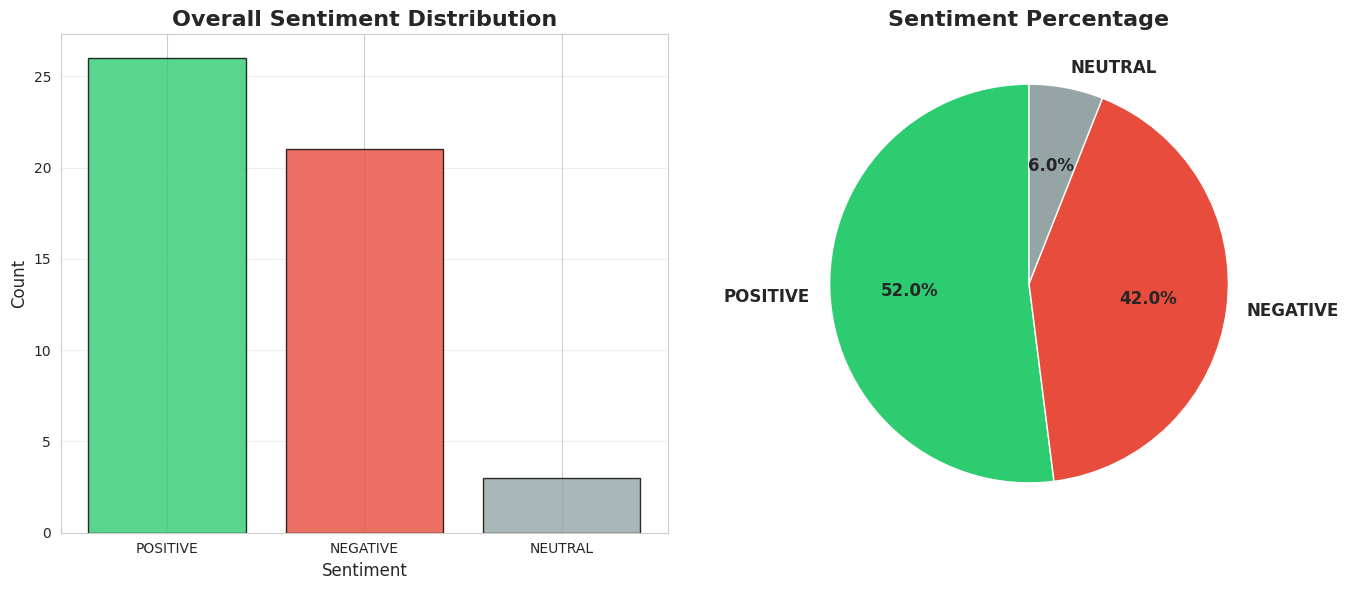

📈 Creating Visualization 2: Topic Distribution...


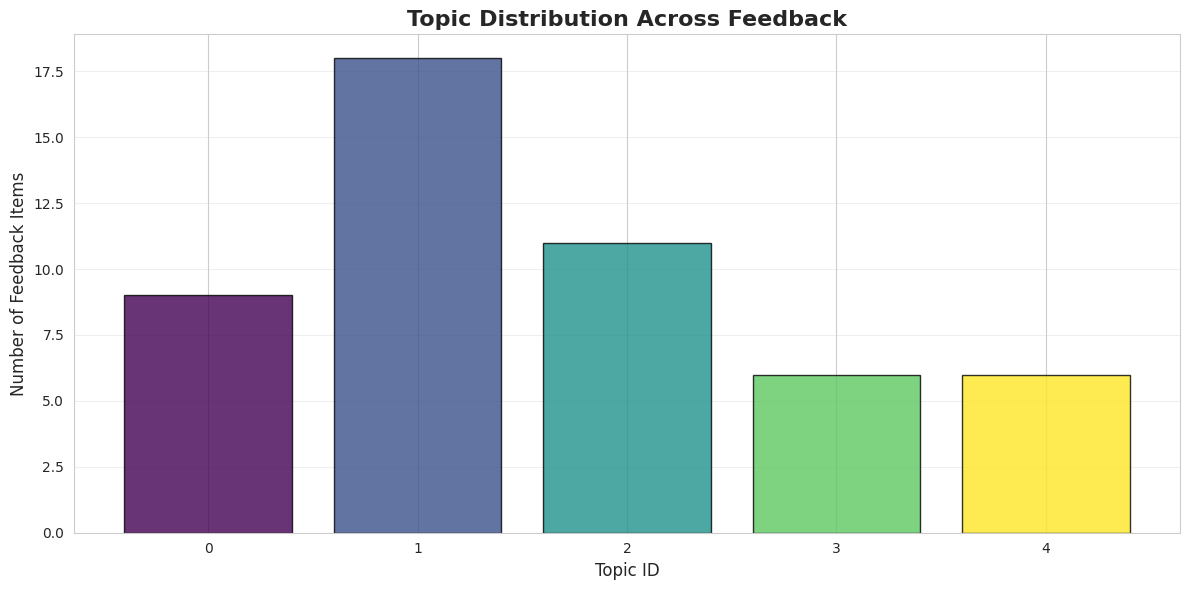

📈 Creating Visualization 3: Sentiment by Topic...


<Figure size 1400x700 with 0 Axes>

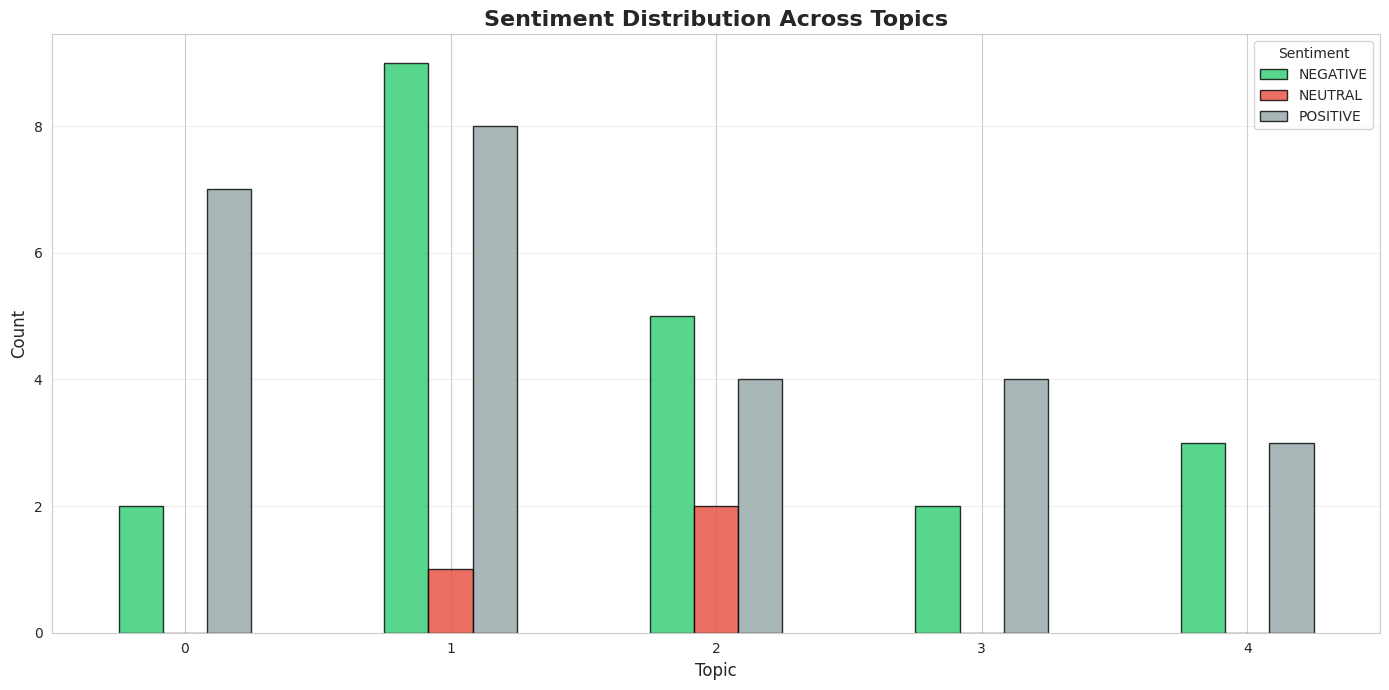

📈 Creating Visualization 4: Hybrid Cluster Analysis...


<Figure size 1400x700 with 0 Axes>

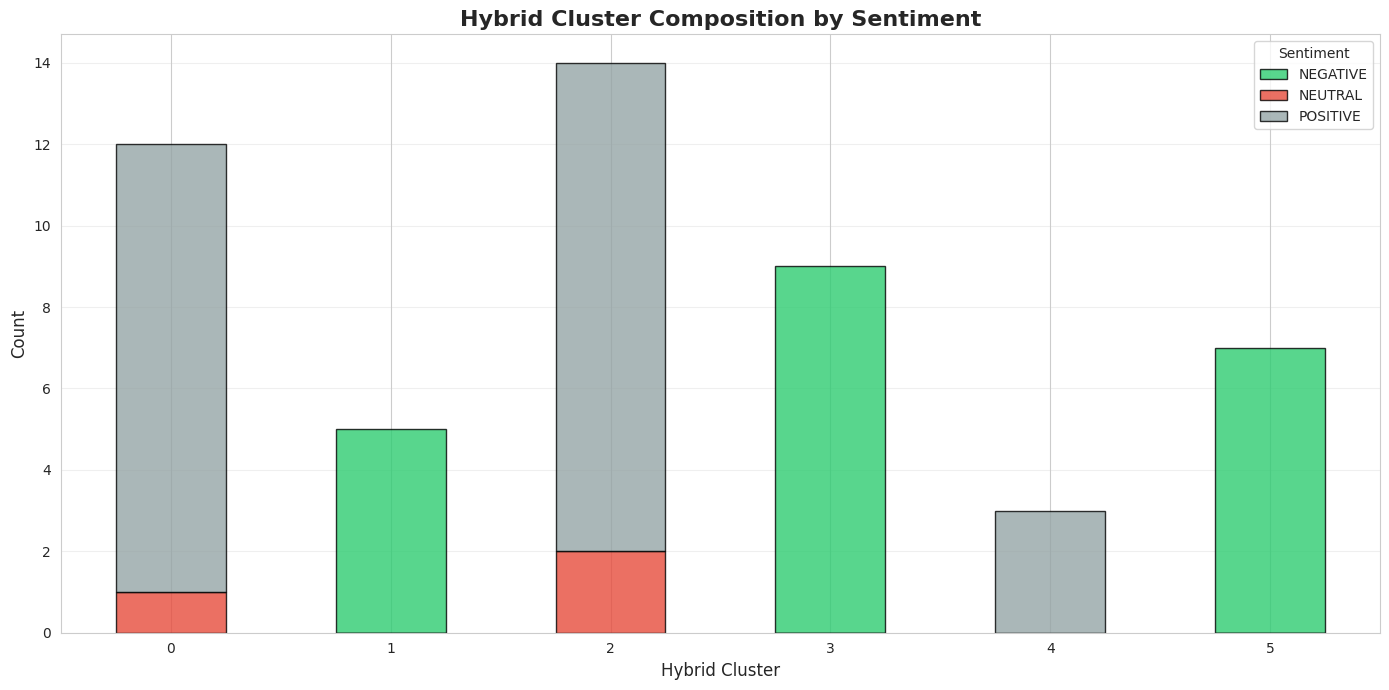

📈 Creating Visualization 5: Positive Word Cloud...


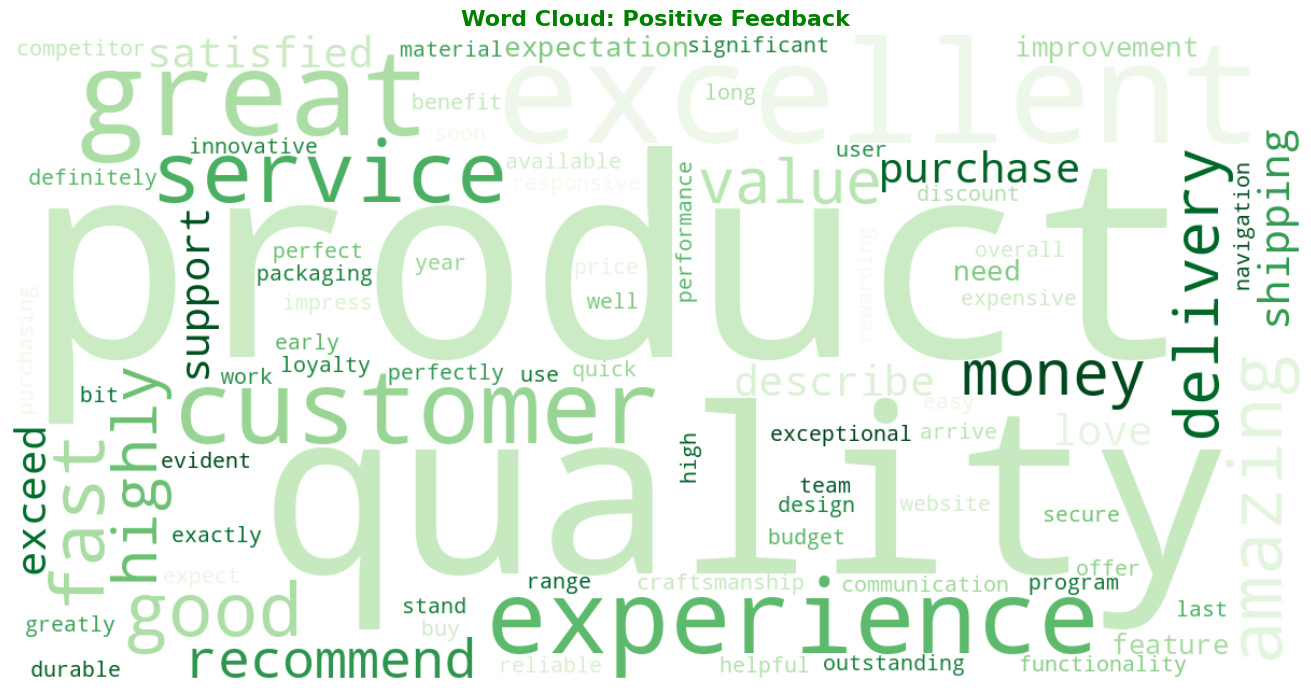

📈 Creating Visualization 6: Negative Word Cloud...


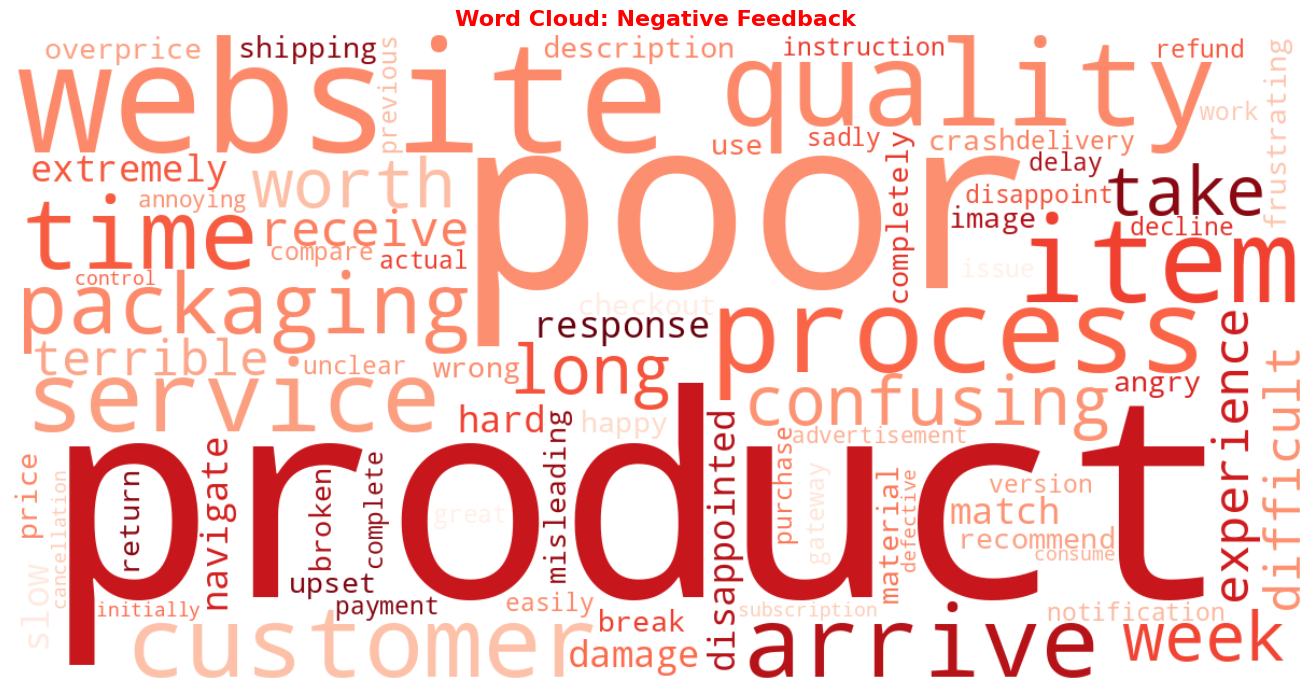

📈 Creating Visualization 7: Sentiment-Topic Heatmap...


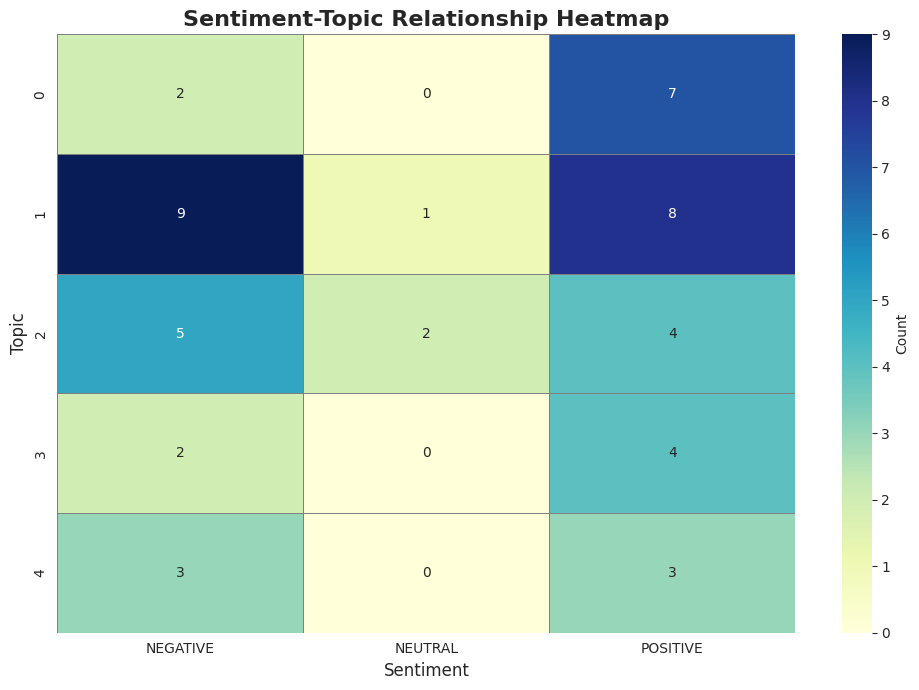

📈 Creating Visualization 8: t-SNE Cluster Visualization...


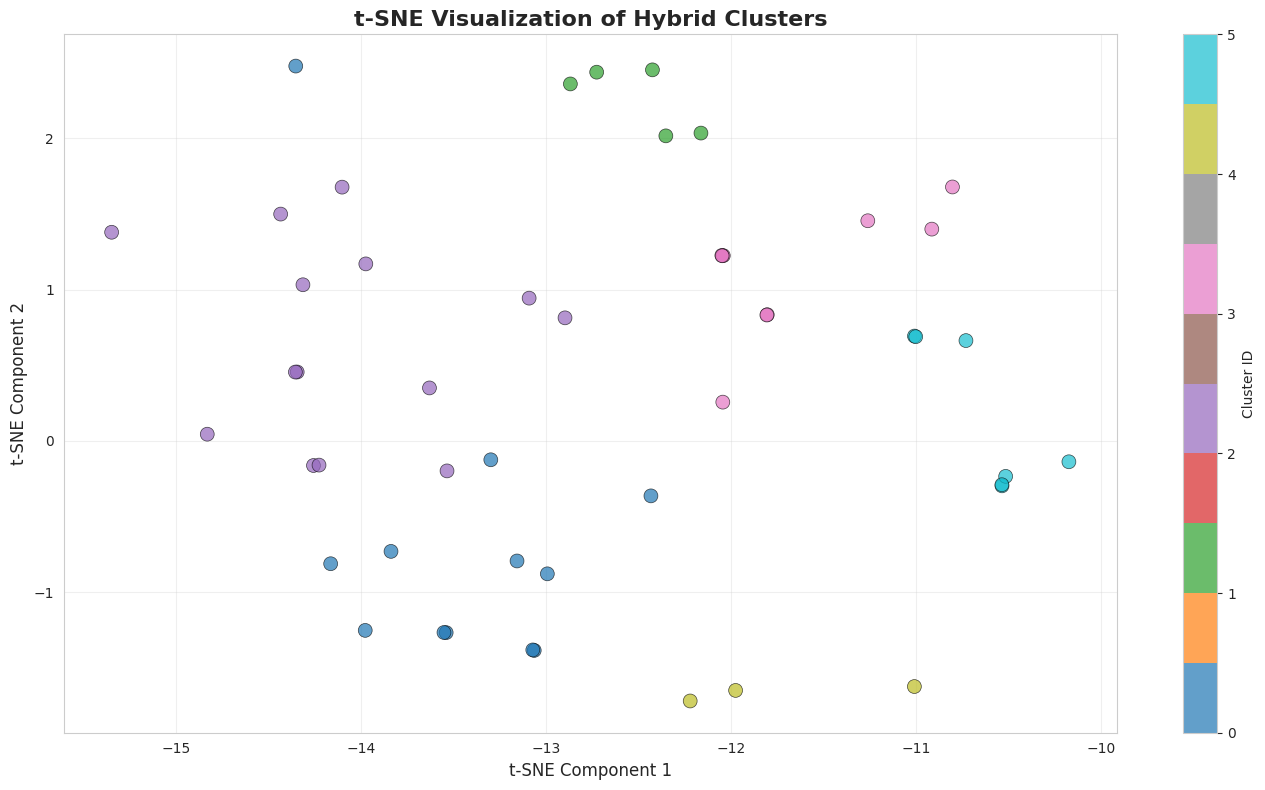

📈 Creating Visualization 9: Sentiment Confidence Distribution...


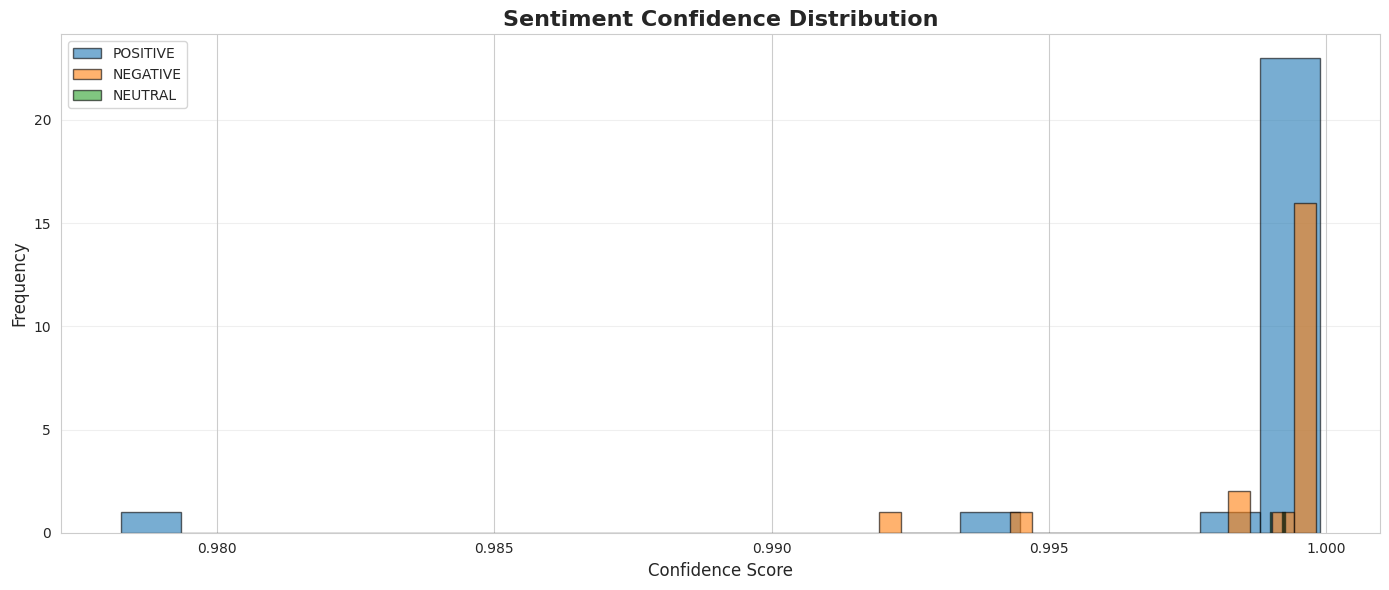

📈 Creating Visualization 10: Topic Keywords...


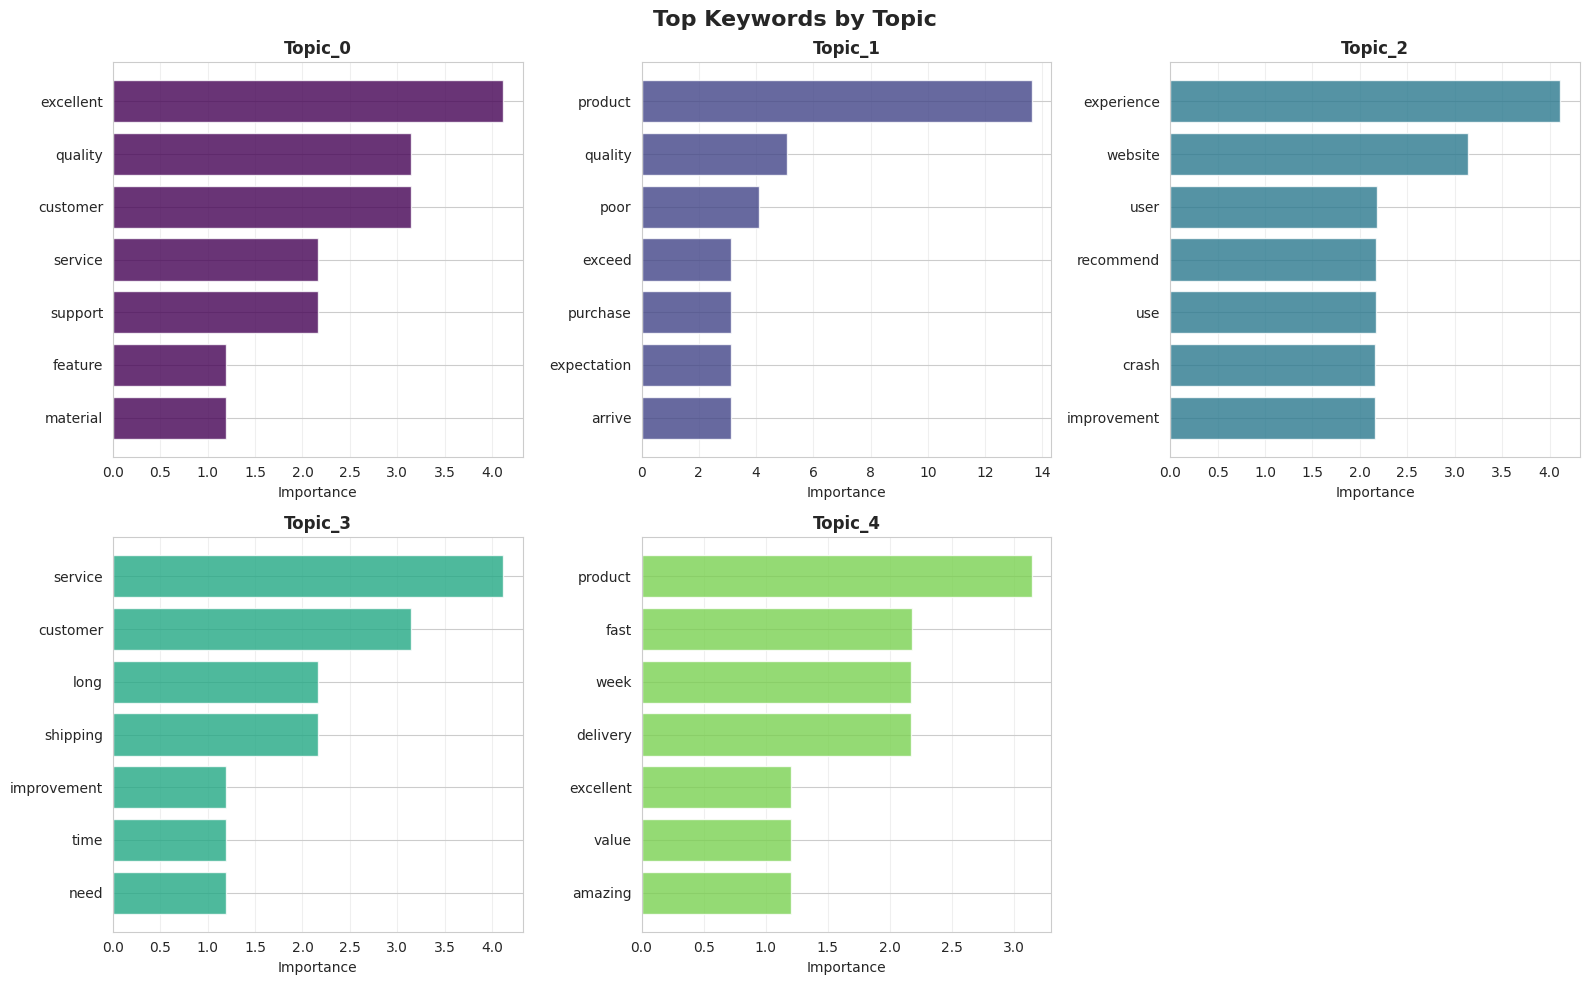


✅ All visualizations created and saved!


In [ ]:
print("\n" + "=" * 80)
print("📊 GENERATING VISUALIZATIONS")
print("=" * 80)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

# Visualization 1: Overall Sentiment Distribution
print("\n📈 Creating Visualization 1: Sentiment Distribution...")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
sentiment_counts = data['sentiment_consensus'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#95a5a6']
ax[0].bar(sentiment_counts.index, sentiment_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax[0].set_title('Overall Sentiment Distribution', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Sentiment', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].grid(axis='y', alpha=0.3)

# Pie chart
ax[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
          colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax[1].set_title('Sentiment Percentage', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Topic Distribution
print("📈 Creating Visualization 2: Topic Distribution...")
plt.figure(figsize=(12, 6))
topic_counts = data['topic'].value_counts().sort_index()
colors_topic = plt.cm.viridis(np.linspace(0, 1, len(topic_counts)))
plt.bar(topic_counts.index, topic_counts.values, color=colors_topic, alpha=0.8, edgecolor='black')
plt.title('Topic Distribution Across Feedback', fontsize=16, fontweight='bold')
plt.xlabel('Topic ID', fontsize=12)
plt.ylabel('Number of Feedback Items', fontsize=12)
plt.xticks(topic_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('topic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Sentiment by Topic (Grouped Bar)
print("📈 Creating Visualization 3: Sentiment by Topic...")
plt.figure(figsize=(14, 7))
sentiment_topic_df = pd.crosstab(data['topic'], data['sentiment_consensus'])
sentiment_topic_df.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c', '#95a5a6'],
                         alpha=0.8, edgecolor='black')
plt.title('Sentiment Distribution Across Topics', fontsize=16, fontweight='bold')
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_by_topic.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Hybrid Cluster Analysis
print("📈 Creating Visualization 4: Hybrid Cluster Analysis...")
plt.figure(figsize=(14, 7))
cluster_sentiment = pd.crosstab(data['hybrid_cluster'], data['sentiment_consensus'])
cluster_sentiment.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c', '#95a5a6'],
                       alpha=0.8, edgecolor='black')
plt.title('Hybrid Cluster Composition by Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Hybrid Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('hybrid_cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 5: Word Cloud - Positive Feedback
print("📈 Creating Visualization 5: Positive Word Cloud...")
positive_text = ' '.join(data[data['sentiment_consensus'] == 'POSITIVE']['cleaned'])
if positive_text:
    wordcloud_pos = WordCloud(width=1200, height=600, background_color='white',
                               colormap='Greens', max_words=100).generate(positive_text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Word Cloud: Positive Feedback', fontsize=16, fontweight='bold', color='green')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('wordcloud_positive.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualization 6: Word Cloud - Negative Feedback
print("📈 Creating Visualization 6: Negative Word Cloud...")
negative_text = ' '.join(data[data['sentiment_consensus'] == 'NEGATIVE']['cleaned'])
if negative_text:
    wordcloud_neg = WordCloud(width=1200, height=600, background_color='white',
                               colormap='Reds', max_words=100).generate(negative_text)
    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Word Cloud: Negative Feedback', fontsize=16, fontweight='bold', color='red')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('wordcloud_negative.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualization 7: Sentiment-Topic Heatmap
print("📈 Creating Visualization 7: Sentiment-Topic Heatmap...")
plt.figure(figsize=(10, 7))
heatmap_data = pd.crosstab(data['topic'], data['sentiment_consensus'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu',
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')
plt.title('Sentiment-Topic Relationship Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.tight_layout()
plt.savefig('sentiment_topic_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 8: t-SNE Cluster Visualization
print("📈 Creating Visualization 8: t-SNE Cluster Visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(data)-1))
tsne_results = tsne.fit_transform(hybrid_features_scaled)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                      c=data['hybrid_cluster'], cmap='tab10',
                      s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster ID')
plt.title('t-SNE Visualization of Hybrid Clusters', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('tsne_cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 9: Sentiment Confidence Distribution
print("📈 Creating Visualization 9: Sentiment Confidence Distribution...")
plt.figure(figsize=(14, 6))
for sentiment in data['sentiment_consensus'].unique():
    subset = data[data['sentiment_consensus'] == sentiment]['confidence_bert']
    plt.hist(subset, bins=20, alpha=0.6, label=sentiment, edgecolor='black')
plt.title('Sentiment Confidence Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('confidence_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 10: Topic Keywords Bar Chart
print("📈 Creating Visualization 10: Topic Keywords...")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, (topic_name, keywords) in enumerate(topic_keywords.items()):
    if idx < len(axes):
        word_importance = lda_model.components_[idx]
        top_indices = word_importance.argsort()[-7:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_scores = word_importance[top_indices]

        axes[idx].barh(top_words, top_scores, color=plt.cm.viridis(idx/n_topics), alpha=0.8)
        axes[idx].set_title(f'{topic_name}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Importance', fontsize=10)
        axes[idx].invert_yaxis()
        axes[idx].grid(axis='x', alpha=0.3)

# Hide extra subplot
if len(topic_keywords) < len(axes):
    axes[-1].axis('off')

plt.suptitle('Top Keywords by Topic', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('topic_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All visualizations created and saved!")

In [ ]:
print("\n" + "=" * 80)
print("💾 EXPORTING RESULTS")
print("=" * 80)

# Export main results
results_columns = [
    'feedback_id', 'feedback', 'cleaned', 'word_count', 'char_count',
    'sentiment_consensus', 'confidence_bert', 'topic', 'topic_confidence',
    'hybrid_cluster', 'sentiment_textblob', 'sentiment_vader', 'sentiment_bert'
]
results_df = data[results_columns].copy()
results_df.to_csv('customervoiceai_detailed_results.csv', index=False)
print("✅ Detailed results saved: customervoiceai_detailed_results.csv")

# Export summary statistics
summary_stats = {
    'Total_Feedback': len(data),
    'Positive_Count': len(data[data['sentiment_consensus'] == 'POSITIVE']),
    'Negative_Count': len(data[data['sentiment_consensus'] == 'NEGATIVE']),
    'Neutral_Count': len(data[data['sentiment_consensus'] == 'NEUTRAL']),
    'Positive_Percentage': f"{len(data[data['sentiment_consensus'] == 'POSITIVE'])/len(data)*100:.2f}%",
    'Negative_Percentage': f"{len(data[data['sentiment_consensus'] == 'NEGATIVE'])/len(data)*100:.2f}%",
    'Neutral_Percentage': f"{len(data[data['sentiment_consensus'] == 'NEUTRAL'])/len(data)*100:.2f}%",
    'Number_of_Topics': n_topics,
    'Number_of_Clusters': n_clusters,
    'Silhouette_Score': f"{max(silhouette_agg, silhouette_kmeans):.4f}",
    'Davies_Bouldin_Score': f"{min(davies_bouldin_agg, davies_bouldin_kmeans):.4f}",
    'Calinski_Harabasz_Score': f"{max(calinski_agg, calinski_kmeans):.2f}",
    'Avg_Word_Count': f"{data['word_count'].mean():.2f}",
    'Avg_Confidence': f"{data['confidence_bert'].mean():.3f}"
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('customervoiceai_summary.csv', index=False)
print("✅ Summary statistics saved: customervoiceai_summary.csv")

# Export cluster characteristics
cluster_summary = []
for cluster_id in sorted(data['hybrid_cluster'].unique()):
    cluster_data = data[data['hybrid_cluster'] == cluster_id]
    cluster_summary.append({
        'Cluster_ID': cluster_id,
        'Size': len(cluster_data),
        'Percentage': f"{len(cluster_data)/len(data)*100:.1f}%",
        'Dominant_Sentiment': cluster_data['sentiment_consensus'].mode()[0],
        'Dominant_Topic': cluster_data['topic'].mode()[0],
        'Avg_Confidence': f"{cluster_data['confidence_bert'].mean():.3f}",
        'Avg_Word_Count': f"{cluster_data['word_count'].mean():.2f}"
    })

cluster_df = pd.DataFrame(cluster_summary)
cluster_df.to_csv('customervoiceai_cluster_summary.csv', index=False)
print("✅ Cluster summary saved: customervoiceai_cluster_summary.csv")

# Export topic keywords
topic_keywords_df = pd.DataFrame.from_dict(topic_keywords, orient='index')
topic_keywords_df.columns = [f'Keyword_{i+1}' for i in range(topic_keywords_df.shape[1])]
topic_keywords_df.to_csv('customervoiceai_topic_keywords.csv')
print("✅ Topic keywords saved: customervoiceai_topic_keywords.csv")


💾 EXPORTING RESULTS
✅ Detailed results saved: customervoiceai_detailed_results.csv
✅ Summary statistics saved: customervoiceai_summary.csv
✅ Cluster summary saved: customervoiceai_cluster_summary.csv
✅ Topic keywords saved: customervoiceai_topic_keywords.csv


In [ ]:
print("\n" + "=" * 80)
print("✅ CUSTOMERVOICEAI: ANALYSIS COMPLETE")
print("=" * 80)

print("\n📊 EXECUTIVE SUMMARY:")
print("-" * 80)
for key, value in summary_stats.items():
    print(f"  {key.replace('_', ' ')}: {value}")

print("\n💡 KEY INSIGHTS:")
print("-" * 80)
pos_pct = len(data[data['sentiment_consensus'] == 'POSITIVE'])/len(data)*100
neg_pct = len(data[data['sentiment_consensus'] == 'NEGATIVE'])/len(data)*100
neu_pct = len(data[data['sentiment_consensus'] == 'NEUTRAL'])/len(data)*100

print(f"  • {pos_pct:.1f}% of customer feedback is POSITIVE")
print(f"  • {neg_pct:.1f}% of customer feedback is NEGATIVE")
print(f"  • {neu_pct:.1f}% of customer feedback is NEUTRAL")
print(f"  • Identified {n_topics} distinct topics in feedback")
print(f"  • Created {n_clusters} actionable hybrid clusters")
print(f"  • Average sentiment confidence: {data['confidence_bert'].mean():.3f}")
print(f"  • Clustering quality (Silhouette): {max(silhouette_agg, silhouette_kmeans):.4f}")

print("\n🎯 ACTIONABLE RECOMMENDATIONS:")
print("-" * 80)
if neg_pct > 20:
    print("  ⚠️  High negative feedback detected - prioritize customer service improvements")
if neu_pct > 30:
    print("  ℹ️  Significant neutral sentiment - engage customers for clearer feedback")
if pos_pct > 60:
    print("  ✅ Strong positive sentiment - leverage for marketing and testimonials")

print("\n📁 EXPORTED FILES:")
print("-" * 80)
print("  • customervoiceai_detailed_results.csv")
print("  • customervoiceai_summary.csv")
print("  • customervoiceai_cluster_summary.csv")
print("  • customervoiceai_topic_keywords.csv")
print("  • 10 visualization PNG files")

print("\n" + "=" * 80)
print("🎉 ALL PROCESSING COMPLETE! 🎉")
print("=" * 80)


✅ CUSTOMERVOICEAI: ANALYSIS COMPLETE

📊 EXECUTIVE SUMMARY:
--------------------------------------------------------------------------------
  Total Feedback: 50
  Positive Count: 26
  Negative Count: 21
  Neutral Count: 3
  Positive Percentage: 52.00%
  Negative Percentage: 42.00%
  Neutral Percentage: 6.00%
  Number of Topics: 5
  Number of Clusters: 6
  Silhouette Score: 0.3056
  Davies Bouldin Score: 1.0099
  Calinski Harabasz Score: 16.12
  Avg Word Count: 7.54
  Avg Confidence: 0.999

💡 KEY INSIGHTS:
--------------------------------------------------------------------------------
  • 52.0% of customer feedback is POSITIVE
  • 42.0% of customer feedback is NEGATIVE
  • 6.0% of customer feedback is NEUTRAL
  • Identified 5 distinct topics in feedback
  • Created 6 actionable hybrid clusters
  • Average sentiment confidence: 0.999
  • Clustering quality (Silhouette): 0.3056

🎯 ACTIONABLE RECOMMENDATIONS:
-------------------------------------------------------------------------------